Counted 264 grcs within bounds
Height: 4, Aspect: 1.33


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


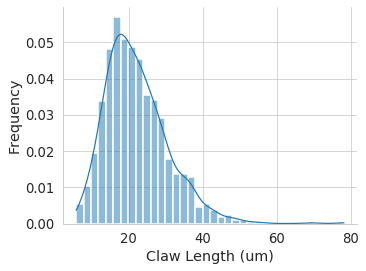

Height: 4, Aspect: 1.33


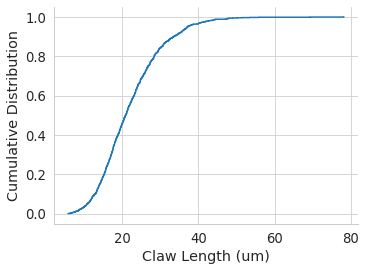

In [5]:

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

from tools_pattern import get_eucledean_dist

'''Load data'''
import compress_pickle
fname = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114.gz'
input_graph = compress_pickle.load(fname)
# min_pattern_len, true_data, fake_data_list = data

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

def to_ng_coord(coord):
    return (
        int(coord[0]/4),
        int(coord[1]/4),
        int(coord[2]/40),
        )

# def get_eucledean_dist(a, b):
#     return np.linalg.norm(
#         (a[0]-b[0], a[1]-b[1], a[2]-b[2]))

# def get_distance(u, v):
#     return get_eucledean_dist(u, v)

import compress_pickle
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114_restricted_z.gz')
input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114.gz')
grcs = [k for k in input_graph.grcs.keys()]

# z_min = 15
# z_max = 35
z_min = 20000
z_max = 30000
x_min = 360000
x_max = 520000
mpd = MyPlotData()

# for mf_id, mf in input_graph.mfs.items():
#     rosette_capacities = mf.get_rosette_loc_capacity()
#     for rosette_loc, claw_count in rosette_capacities.items():
#         x, y, z = rosette_loc
#         if x < 360000 or x > 520000:
#             continue
#         if z < z_min*1000 or z > z_max*1000:
#             continue
#         mpd.add_data_point(
#             x=x/1000,
#             y=y/1000,
#             z=z/1000,
#             claw_count=claw_count,
#             )

raw = []

def get_claw_lengths(in_graph):
    mpd = MyPlotData()
    # claw_lengths = defaultdict(int)
    num_grcs = 0
    for grc_id in in_graph.grcs:
        grc = in_graph.grcs[grc_id]
        soma_loc = grc.soma_loc
        x, y, z = soma_loc
        if x < x_min or x > x_max:
            continue
        if z < z_min or z > z_max:
            continue
        for e in grc.edges:
            d = get_eucledean_dist(grc.soma_loc, e[1])
            d = d/1000
            # claw_lengths[d] += 1
            raw.append(int(d))
            mpd.add_data_point(
                kind='Data',
                claw_length=d,
                )
        num_grcs += 1
    print(f'Counted {num_grcs} grcs within bounds')
    return mpd

mpd = get_claw_lengths(input_graph)

# random_claw_lengths = []
# for i in range(10):
#     input_graph.randomize_graph()
#     random_claw_lengths.append

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'claw_length_201109_20_30'


compress_pickle.dump(
    raw,
    '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'
    'grc_dendrite_len_dist_db_201109.gz')



importlib.reload(my_plot); my_plot.my_displot(
    mpd, x='claw_length',
    # hue='kind',
    kind='hist',
    stat="density",
    kde=True,
    # hue_order=['Data', 'Shuffle'],
    context='paper',
    # xlim=(0, 13),
    # ylim=[0, 1.01],
    height=4,
    aspect=1.33,
    y_axis_label='Frequency',
    x_axis_label='Claw Length (um)',
    save_filename=f'{script_n}_hist.svg',
    show=True,
    )

importlib.reload(my_plot); my_plot.my_displot(
    mpd, x='claw_length',
    # hue='kind',
    kind='ecdf',
    # stat="frequency",
    # kde=True,
    # hue_order=['Data', 'Shuffle'],
    context='paper',
    # xlim=(0, 13),
    # ylim=[0, 1.01],
    height=4,
    aspect=1.33,
    y_axis_label='Cumulative Distribution',
    x_axis_label='Claw Length (um)',
    save_filename=f'{script_n}_cdf.svg',
    show=True,
    )



In [7]:

import statistics
mean = statistics.mean(raw)
median = statistics.median(raw)
stdev = statistics.stdev(raw, mean)
print(f'Mean: {mean}, median: {median}, std: {stdev}')
print(f'Average: {sum(raw)/len(raw)}')
print(f'n = {len(raw)}')
# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'rosette_size_figure_210228_smaller_roi'



Mean: 21.681610247026534, median: 20, std: 8.457889675978898
Average: 21.681610247026534
n = 1093
